# Neural network for Classification

Last module we looked into a regression problem, and in this module let's look at a classification problem

# 1.Get a toy classification data

In [1]:
from sklearn.datasets import make_circles

data_points = 10000

X,y = make_circles(n_samples=data_points,
                   noise=0.01,
                   random_state=0)

In [2]:
# Visualizing it quickly --
X[:5], y[:5]

(array([[ 0.58344707, -0.56284871],
        [ 0.43500909,  0.90155321],
        [-0.99818084,  0.13827675],
        [ 0.33488067,  0.72280963],
        [-0.98323034,  0.20130225]]),
 array([1, 0, 0, 1, 0]))

In [3]:
# Get to pandas dataframe
import pandas as pd

cirles = pd.DataFrame({"X1":X[:,0],
                       "X2":X[:,1],
                       "label":y})
cirles.head()

,X1,X2,label
0,0.583447,-0.562849,1
1,0.435009,0.901553,0
2,-0.998181,0.138277,0
3,0.334881,0.722810,1
4,-0.983230,0.201302,0


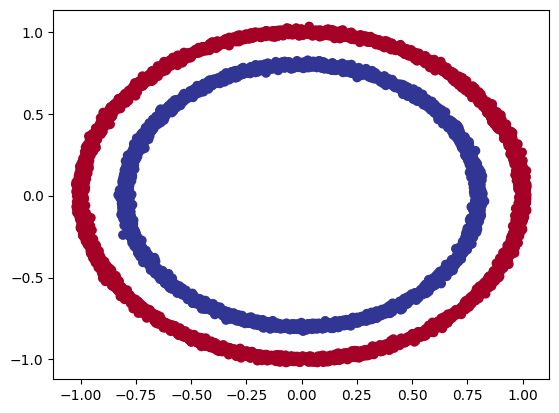

In [4]:
# Plotting the data
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)
plt.show()

Note: This is a small dataset. But it is effective for classification.

## 1.1 Let's prepare the data for PyTorch

In [5]:
# Let's import key libraries
import torch
from torch import nn  # nn has all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import Markdown as md
print(torch.__version__)

2.4.1+cu121


In [6]:
# To convert to torch.tensor we need to know what is the current type of X and y is along with their data types
type(X), type(y), X.dtype, y.dtype

(numpy.ndarray, numpy.ndarray, dtype('float64'), dtype('int64'))

In [7]:
# Let's also get to the default torch dtype
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [8]:
X[:5], y[:5], type(X), type(y), X.dtype, y.dtype

(tensor([[ 0.5834, -0.5628],
         [ 0.4350,  0.9016],
         [-0.9982,  0.1383],
         [ 0.3349,  0.7228],
         [-0.9832,  0.2013]]),
 tensor([1., 0., 0., 1., 0.]),
 torch.Tensor,
 torch.Tensor,
 torch.float32,
 torch.float32)

## 1.2 Split data to Train and Test (we can also do val)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

In [10]:
len(X_train), len(X_test), len(y_train), len(y_test)

(8000, 2000, 8000, 2000)

# 2.Build a model

a) Set up device agnostic code

b) Construct a model by subclassing nn.Module

c) Define loss function and optimizer

d) Loop through to train and check performance on test data

In [11]:
# a) Set up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [12]:
X_train.shape, y_train.shape

(torch.Size([8000, 2]), torch.Size([8000]))

In [13]:
# b) Let's build the non-linear model
class Non_linear_model0(nn.Module): # inherits from nn.Module (base class for all NN models)
    def __init__(self):
        super().__init__()

        # Create 2 nn.Linear models able to handle our data
        # Use nn.Linear for creating the model param

        self.linear_layer_1 = nn.Linear(in_features=2, out_features=8)
        self.linear_layer_2 = nn.Linear(in_features=8, out_features=1)

        # Chain the layers together using nn.Sequential
        # self.seq_model = nn.Sequential(
        #     self.linear_layer_1,
        #     nn.ReLU(),
        #     self.linear_layer_2,
        #     nn.Sigmoid()
        # )

    def forward(self, x: torch.tensor) -> torch.tensor:
      return self.linear_layer_2(self.linear_layer_1(x))

In [14]:
# create random seed
torch.manual_seed(42)

Model_1 = Non_linear_model0()
Model_1

Non_linear_model0(
  (linear_layer_1): Linear(in_features=2, out_features=8, bias=True)
  (linear_layer_2): Linear(in_features=8, out_features=1, bias=True)
)

In [15]:
# the otherway to do define the model is directly with nn.Sequential
Model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=8),
    nn.Linear(in_features=8, out_features=1),
)
Model_1

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=1, bias=True)
)

In [16]:
Model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1177, -0.2296],
                      [ 0.4370,  0.1102],
                      [ 0.5713,  0.0773],
                      [-0.2230,  0.1900],
                      [-0.1918,  0.2976],
                      [ 0.6313,  0.4087],
                      [-0.3091,  0.4082],
                      [ 0.1265,  0.3591]])),
             ('0.bias',
              tensor([-0.4310, -0.7000, -0.2732, -0.5424,  0.5802,  0.2037,  0.2929,  0.2236])),
             ('1.weight',
              tensor([[-0.0062,  0.2767, -0.2512,  0.0223, -0.2413,  0.1090, -0.1218,  0.1083]])),
             ('1.bias', tensor([-0.0737]))])

In [17]:
# For fun lets make some predictions based on initiated model
with torch.inference_mode():  # Context manager. It disables all grad calculation for training. Use this only when predicting on test
  y_test_preds = Model_1(X_test)

y_test_preds.shape, X_test.shape,y_test_preds.shape, y_test_preds ,y_test

(torch.Size([2000, 1]),
 torch.Size([2000, 2]),
 torch.Size([2000, 1]),
 tensor([[-0.4769],
         [-0.4272],
         [-0.4691],
         ...,
         [-0.2677],
         [-0.3044],
         [-0.3720]]),
 tensor([0., 0., 0.,  ..., 0., 1., 1.]))

## 2.1 All the loss functions are listed here
https://pytorch.org/docs/stable/nn.html#loss-functions

In [18]:
# Setting up loss Using MLE -- using BCEWithLogitsLoss
loss_fn = nn.BCEWithLogitsLoss() # This has Sigmoid activation function already built in => Sigmoid + BCE loss together

# Also BCEwithLogitsLoss gives numerical stability


In [19]:
# Define an optimizer
optimizer = torch.optim.SGD(params = Model_1.parameters(), lr  = 0.1)

In [20]:
# Define a evaluation metrics -- Accuracy for simplicity
def accuracy_fn(y_true, y_pred):
  correct_preds = torch.eq(y_true,y_pred).sum().item()
  acc = correct_preds/len(y_pred)
  return acc

# 3.Train the model

High level steps are -

1. Make forward pass and predict
2. calculate loss
3. Flush the earlier grads to 0 and calculate gradients backwards (backpropagation)
4. Update params - take a step
5. Loop over
6. Evaluate model performance



## 3.1 Going from logits ->prediction_probabilities -> prediction Labels

- The model op is raw **logits**
- We can convert these logits to **prediction probabilities** : using sigmoid or siftmax
- Then convert the prediction probabilities to **labels** : argmax

In [21]:
# Applying Sigmoid on top of model op (This is just based from init model on test data)
y_test_preds_value = torch.sigmoid(y_test_preds)

In [22]:
# Converting probabilities to labels -- either of the methods work for binary classification
# y_test_preds_labels = torch.tensor((y_test_preds_value>0.5).type(torch.int64)).squeeze()
y_test_preds_labels = torch.round(y_test_preds_value).squeeze()

In [23]:
# Testing accuracy of our initial model
accuracy_fn(y_test, y_test_preds_labels)

0.4965

In [24]:
# Set manual seed
torch.manual_seed(42)

# An epoch is one loop through training data
epochs = 2000
train_loss_capture = []
test_loss_capture = []
for epoch in range(epochs):
    # set the model to training mode
    Model_1.train() # Sets requires_grad = True

    # 1. forward pass
    y_logit = Model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logit))
    #print(y_pred,y_train)

    #2. Calculate loss
    loss = loss_fn(y_logit , y_train) # This needs to be passed according to what the loss function is. Some need you to add Sigmoid function others expect you to pass logits directly
    acc_train = accuracy_fn(y_train, y_pred)
    # if epoch % 10 == 0:
    #   print(f"epoch: {epoch}: loss:{loss}, Accuracy: {acc}")
    train_loss_capture.append(loss.item())

    # 3. Calculate gradient and Back propagation
    optimizer.zero_grad() # to clear out the gradients of all parameters that the optimizer is tracking
    loss.backward()

    # 4. Update parameters using an Optimizer
    optimizer.step()


    Model_1.eval()
    # Testing on validation set
    with torch.inference_mode():  # Context manager. It disables all grad calculation for training. Use this only when predicting on test
      y_test_preds = Model_1(X_test).squeeze()
      test_loss = loss_fn(y_test_preds, y_test)
      y_pred_test = torch.round(torch.sigmoid(y_test_preds))
      acc_test = accuracy_fn(y_test, y_pred_test)
      test_loss_capture.append(test_loss.item())
    # print(test_loss, accuracy_fn(y_test, y_pred_test))
    if epoch % 200 == 0:
      print(f"epoch: {epoch}: loss:{loss}, Training Accuracy: {acc_train}, Test accuracy: {acc_test}")

epoch: 0: loss:0.7081430554389954, Training Accuracy: 0.500875, Test accuracy: 0.4965
epoch: 200: loss:0.6931405067443848, Training Accuracy: 0.4745, Test accuracy: 0.4675
epoch: 400: loss:0.6931386590003967, Training Accuracy: 0.48825, Test accuracy: 0.4805
epoch: 600: loss:0.693138599395752, Training Accuracy: 0.48875, Test accuracy: 0.4795
epoch: 800: loss:0.693138599395752, Training Accuracy: 0.488625, Test accuracy: 0.4795
epoch: 1000: loss:0.693138599395752, Training Accuracy: 0.489, Test accuracy: 0.4795
epoch: 1200: loss:0.693138599395752, Training Accuracy: 0.489, Test accuracy: 0.4795
epoch: 1400: loss:0.693138599395752, Training Accuracy: 0.489, Test accuracy: 0.4795
epoch: 1600: loss:0.693138599395752, Training Accuracy: 0.489, Test accuracy: 0.4795
epoch: 1800: loss:0.693138599395752, Training Accuracy: 0.489, Test accuracy: 0.4795


[]

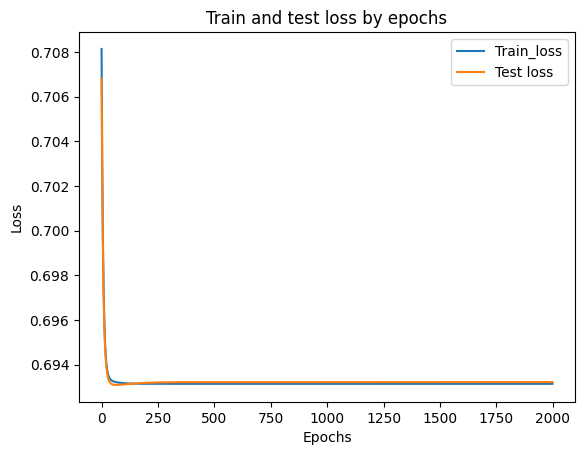

In [25]:
# Plot lose to see if it makes sense!
plt.plot(np.arange(0,epochs), train_loss_capture)
plt.plot(np.arange(0,epochs), test_loss_capture)
plt.title("Train and test loss by epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train_loss", "Test loss"])
plt.plot()

## 3.2 Visualize the trained model results

In [26]:
# Let's predict on test data
with torch.inference_mode():  # Context manager. It disables all grad calculation for training. Use this only when predicting on test
  y_test_preds = Model_1(X_test).squeeze()
  y_pred_test = torch.round(torch.sigmoid(y_test_preds))


In [27]:
# Get the "plot_decision_boundary" function from the follwing location
import requests
from pathlib import Path
# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_decision_boundary #plot_predictions,

Text(0.5, 1.0, 'Test')

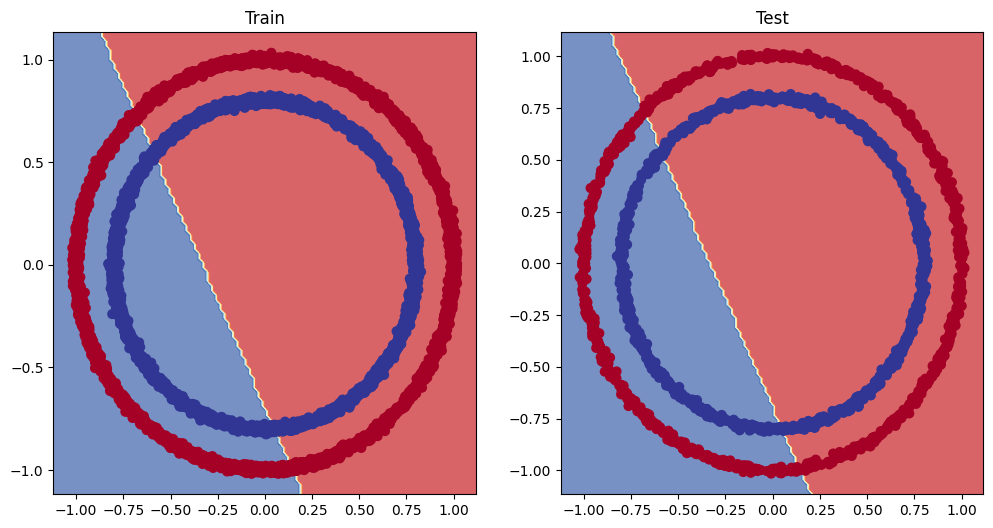

In [28]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plot_decision_boundary(Model_1, X_train, y_train)
plt.title("Train")
plt.subplot(1,2,2)
plot_decision_boundary(Model_1, X_test, y_test)
plt.title("Test")

 This is a purely a linear classification -- No activation function

# 4.Improve the model (model perspective)

### Here are some of the ways to improve the model -- hyperparameters

1. Add more neurons (nodes) to each layer
2. Add more layers
3. Fit/train for longer
4. Try tuning learning rates
5. Change activation funcs
6. Change Loss function
7. Change optimizer - Adam/RMSprop




## 4.1 Add more neurons (nodes) to each layer

In [29]:
# b) Let's build the non-linear model
class Non_linear_model0_increase_neurons(nn.Module): # inherits from nn.Module (base class for all NN models)
    def __init__(self):
        super().__init__()

        # Create 2 nn.Linear models able to handle our data
        # Use nn.Linear for creating the model param

        self.linear_layer_1 = nn.Linear(in_features=2, out_features=32)
        self.linear_layer_2 = nn.Linear(in_features=32, out_features=1)

    def forward(self, x: torch.tensor) -> torch.tensor:
      return self.linear_layer_2(self.linear_layer_1(x))

In [30]:
# Initialization of subclass Non_linear_model1
Model_0_inc_neurons = Non_linear_model0_increase_neurons()

# Defining the loss function
loss_fn = nn.BCEWithLogitsLoss()

# Define the optimizer
optimizer = torch.optim.SGD(params = Model_0_inc_neurons.parameters(), lr  = 0.1) # Very high LR


In [31]:
# Set seed
torch.manual_seed(0)

# An epoch is one loop through training data
epochs = 5000
train_loss_capture = []
test_loss_capture = []
for epoch in range(epochs):
    # set the model to training mode
    Model_0_inc_neurons.train() # Sets requires_grad = True

    # 1. forward pass
    y_logit = Model_0_inc_neurons(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logit))
    #print(y_pred,y_train)

    #2. Calculate loss
    loss = loss_fn(y_logit, y_train)
    acc_train = accuracy_fn(y_train, y_pred)
    train_loss_capture.append(loss.item())

    # 3. Calculate gradient and Back propagation
    optimizer.zero_grad() # to clear out the gradients of all parameters that the optimizer is tracking
    loss.backward()

    # 4. Update parameters using an Optimizer
    optimizer.step()

    Model_0_inc_neurons.eval()

    # Testing on validation set
    with torch.inference_mode():  # Context manager. It disables all grad calculation for training. Use this only when predicting on test
      y_test_preds = Model_0_inc_neurons(X_test).squeeze()
      test_loss = loss_fn(y_test_preds, y_test)
      y_pred_test = torch.round(torch.sigmoid(y_test_preds))
      acc_test = accuracy_fn(y_test, y_pred_test)
      test_loss_capture.append(test_loss.item())
    # print(test_loss, accuracy_fn(y_test, y_pred_test))
    if epoch % 1000 == 0:
      print(f"epoch: {epoch}: loss:{loss}, Training Accuracy: {acc_train}, Test accuracy: {acc_test}")

epoch: 0: loss:0.7456142902374268, Training Accuracy: 0.499125, Test accuracy: 0.5035
epoch: 1000: loss:0.693138599395752, Training Accuracy: 0.489, Test accuracy: 0.4795
epoch: 2000: loss:0.693138599395752, Training Accuracy: 0.489, Test accuracy: 0.4795
epoch: 3000: loss:0.693138599395752, Training Accuracy: 0.489, Test accuracy: 0.4795
epoch: 4000: loss:0.693138599395752, Training Accuracy: 0.489, Test accuracy: 0.4795


Text(0.5, 1.0, 'Test')

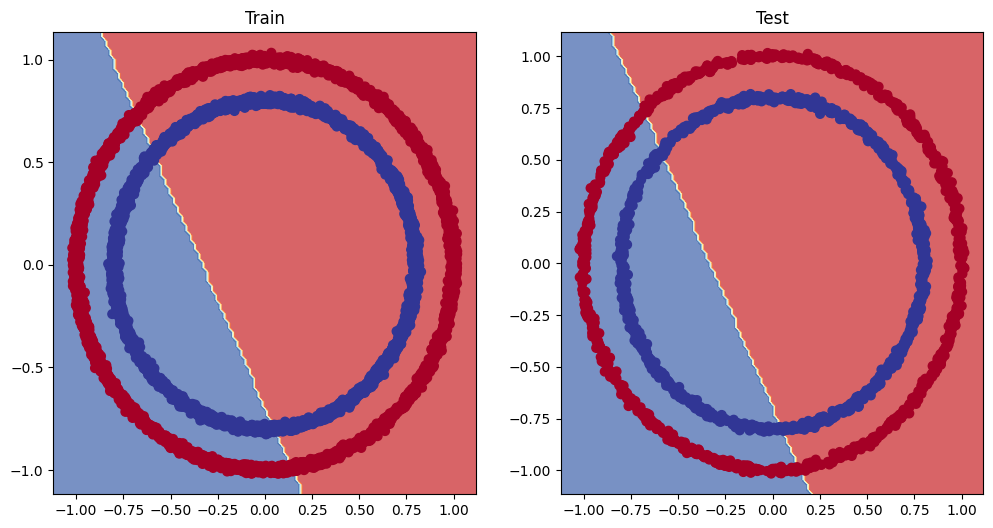

In [32]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plot_decision_boundary(Model_0_inc_neurons, X_train, y_train)
plt.title("Train")
plt.subplot(1,2,2)
plot_decision_boundary(Model_0_inc_neurons, X_test, y_test)
plt.title("Test")

No improvement here

## 4.2 Add more layers

In [33]:
# b) Let's build the non-linear model
class Non_linear_model0_increase_layers(nn.Module): # inherits from nn.Module (base class for all NN models)
    def __init__(self):
        super().__init__()

        # Create 2 nn.Linear models able to handle our data
        # Use nn.Linear for creating the model param

        self.multi_layer = nn.Sequential(
            nn.Linear(in_features=2, out_features=32),
            nn.Linear(in_features=32, out_features=64),
            nn.Linear(in_features=64, out_features=16),
            nn.Linear(in_features=16, out_features=1),
        )

        # self.linear_layer_1 = nn.Linear(in_features=2, out_features=32)
        # self.linear_layer_2 = nn.Linear(in_features=32, out_features=1)

    def forward(self, x: torch.tensor) -> torch.tensor:
      return self.multi_layer(x)

In [34]:
# Initialization of subclass Non_linear_model1
Model_0_inc_layer = Non_linear_model0_increase_layers()

# Defining the loss function
loss_fn = nn.BCEWithLogitsLoss()

# Define the optimizer
optimizer = torch.optim.SGD(params = Model_0_inc_layer.parameters(), lr  = 0.1) # Very high LR


In [35]:
# Set seed
torch.manual_seed(0)

# An epoch is one loop through training data
epochs = 5000
train_loss_capture = []
test_loss_capture = []
for epoch in range(epochs):
    # set the model to training mode
    Model_0_inc_layer.train() # Sets requires_grad = True

    # 1. forward pass
    y_logit = Model_0_inc_layer(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logit))
    #print(y_pred,y_train)

    #2. Calculate loss
    loss = loss_fn(y_logit, y_train)
    acc_train = accuracy_fn(y_train, y_pred)
    train_loss_capture.append(loss.item())

    # 3. Calculate gradient and Back propagation
    optimizer.zero_grad() # to clear out the gradients of all parameters that the optimizer is tracking
    loss.backward()

    # 4. Update parameters using an Optimizer
    optimizer.step()

    Model_0_inc_layer.eval()

    # Testing on validation set
    with torch.inference_mode():  # Context manager. It disables all grad calculation for training. Use this only when predicting on test
      y_test_preds = Model_0_inc_layer(X_test).squeeze()
      test_loss = loss_fn(y_test_preds, y_test)
      y_pred_test = torch.round(torch.sigmoid(y_test_preds))
      acc_test = accuracy_fn(y_test, y_pred_test)
      test_loss_capture.append(test_loss.item())
    # print(test_loss, accuracy_fn(y_test, y_pred_test))
    if epoch % 1000 == 0:
      print(f"epoch: {epoch}: loss:{loss}, Training Accuracy: {acc_train}, Test accuracy: {acc_test}")

epoch: 0: loss:0.7021302580833435, Training Accuracy: 0.499125, Test accuracy: 0.5035
epoch: 1000: loss:0.693138599395752, Training Accuracy: 0.489, Test accuracy: 0.4795
epoch: 2000: loss:0.693138599395752, Training Accuracy: 0.489, Test accuracy: 0.4795
epoch: 3000: loss:0.693138599395752, Training Accuracy: 0.489, Test accuracy: 0.4795
epoch: 4000: loss:0.693138599395752, Training Accuracy: 0.489, Test accuracy: 0.4795


Text(0.5, 1.0, 'Test')

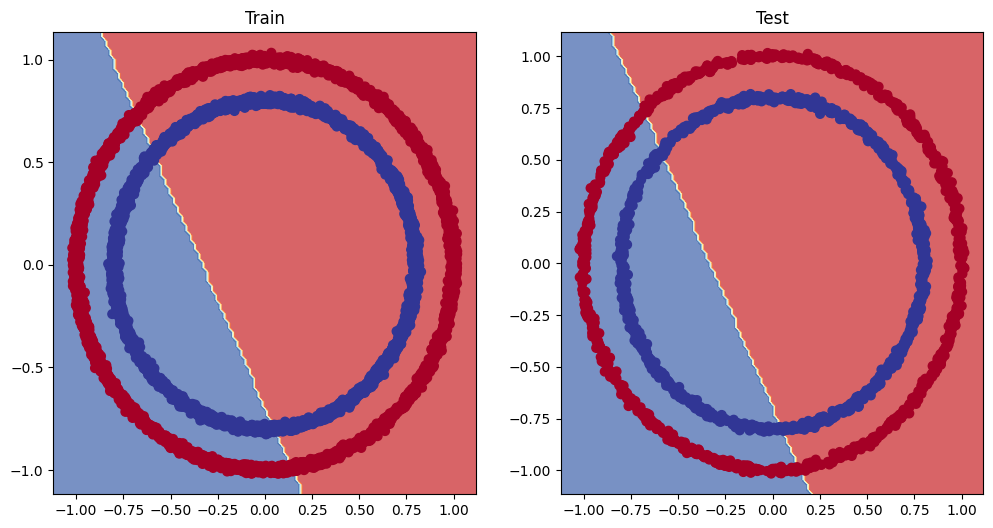

In [36]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plot_decision_boundary(Model_0_inc_layer, X_train, y_train)
plt.title("Train")
plt.subplot(1,2,2)
plot_decision_boundary(Model_0_inc_layer, X_test, y_test)
plt.title("Test")

# 5.Building a better model -- Truly non linear model Adding non linear activations (4++ : skipping few options in 4)

In [37]:
  # c) Let's build a truly non-linear model
class Non_linear_model1(nn.Module): # inherits from nn.Module (base class for all NN models)
    def __init__(self):
        super().__init__()

        # Create 2 nn.Linear models able to handle our data
        # Use nn.Linear for creating the model param

        self.non_lin_layer = nn.Sequential(
            nn.Linear(in_features=2, out_features=32),
            nn.ReLU(),
            nn.Linear(in_features=32, out_features=1),
        )

    def forward(self, x: torch.tensor) -> torch.tensor:
      return self.non_lin_layer(x)

In [38]:
Model_2 = Non_linear_model1()

# Let's predict on test data
with torch.inference_mode():  # Context manager. It disables all grad calculation for training. Use this only when predicting on test
  y_test_preds = Model_2(X_test).squeeze()
  y_pred_test = torch.round(torch.sigmoid(y_test_preds))

# Seeing the distribution of initial prediction
pd.DataFrame({"y_pred_test":y_pred_test})["y_pred_test"].value_counts()

,count
y_pred_test,
0.0,1180
1.0,820


 All are predicted as class 0 lol

In [39]:
# Initialization (instantiate) of subclass Non_linear_model1
Model_2 = Non_linear_model1()

# Defining the loss function
loss_fn = nn.BCEWithLogitsLoss()

# Define the optimizer
optimizer = torch.optim.SGD(params = Model_2.parameters(), lr  = 0.05) # Very high LR

epoch: 0: loss:0.6948421597480774, Training Accuracy: 0.498875, Test accuracy: 0.5025


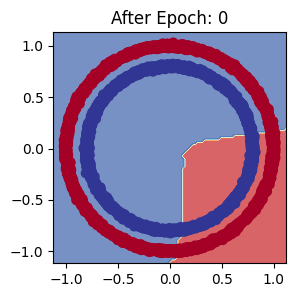

epoch: 1000: loss:0.5958375334739685, Training Accuracy: 0.982375, Test accuracy: 0.98


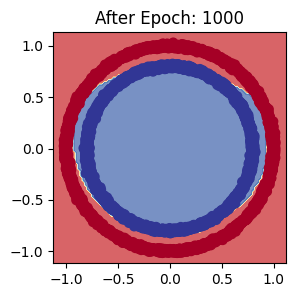

epoch: 2000: loss:0.4302421510219574, Training Accuracy: 1.0, Test accuracy: 1.0


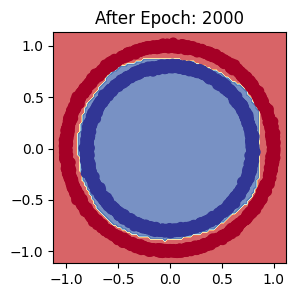

epoch: 3000: loss:0.25183069705963135, Training Accuracy: 1.0, Test accuracy: 1.0


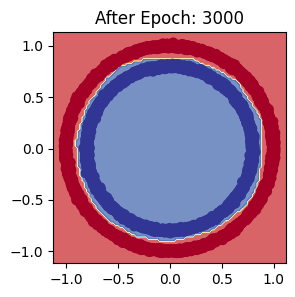

epoch: 4000: loss:0.14011915028095245, Training Accuracy: 1.0, Test accuracy: 1.0


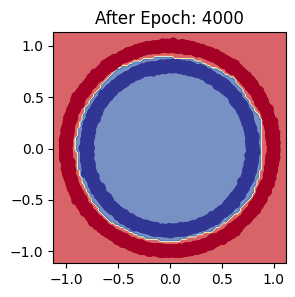

In [40]:
# Set seed
torch.manual_seed(0)

# An epoch is one loop through training data
epochs = 5000
train_loss_capture = []
test_loss_capture = []
for epoch in range(epochs):
    # set the model to training mode
    Model_2.train() # Sets requires_grad = True

    # 1. forward pass
    y_logit = Model_2(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logit))
    #print(y_pred,y_train)

    #2. Calculate loss
    loss = loss_fn(y_logit, y_train)
    acc_train = accuracy_fn(y_train, y_pred)
    train_loss_capture.append(loss.item())

    # 3. Calculate gradient and Back propagation
    optimizer.zero_grad() # to clear out the gradients of all parameters that the optimizer is tracking
    loss.backward()

    # 4. Update parameters using an Optimizer
    optimizer.step()

    Model_2.eval()

    # Testing on validation set
    with torch.inference_mode():  # Context manager. It disables all grad calculation for training. Use this only when predicting on test
      y_test_preds = Model_2(X_test).squeeze()
      test_loss = loss_fn(y_test_preds, y_test)
      y_pred_test = torch.round(torch.sigmoid(y_test_preds))
      acc_test = accuracy_fn(y_test, y_pred_test)
      test_loss_capture.append(test_loss.item())
    # print(test_loss, accuracy_fn(y_test, y_pred_test))
    if epoch % 1000 == 0:
      print(f"epoch: {epoch}: loss:{loss}, Training Accuracy: {acc_train}, Test accuracy: {acc_test}")
      plt.figure(figsize=(3, 3))
      plot_decision_boundary(Model_2, X_train, y_train)
      plt.title(f"After Epoch: {epoch}")
      plt.show()

[]

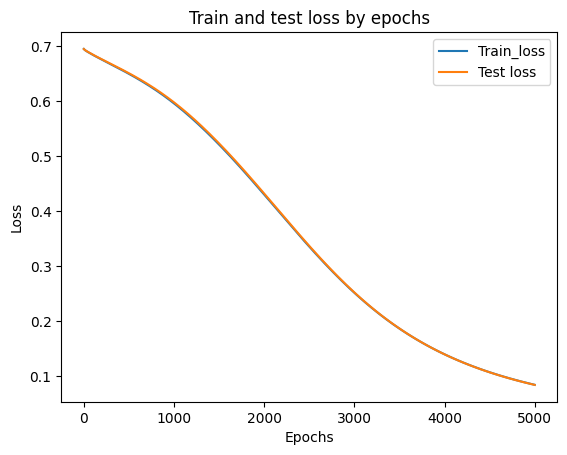

In [41]:
# Plot lose to see if it makes sense!
plt.plot(np.arange(0,epochs), train_loss_capture)
plt.plot(np.arange(0,epochs), test_loss_capture)
plt.title("Train and test loss by epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train_loss", "Test loss"])
plt.plot()

Text(0.5, 1.0, 'Test')

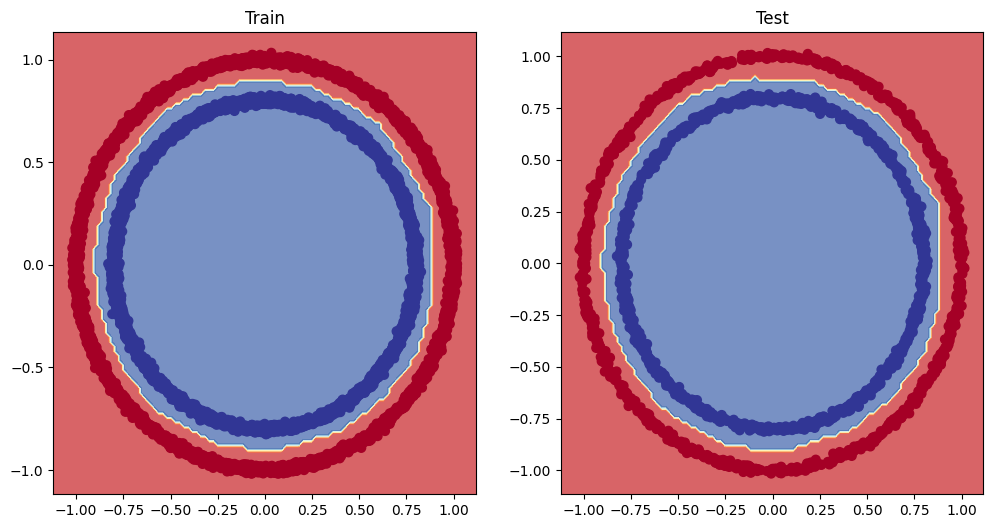

In [42]:
# Plot boundary to see of it makes sense
plt.figure(figsize=(12, 6))
# plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
plot_decision_boundary(Model_2, X_train, y_train)
plt.title("Train")
plt.subplot(1,2,2)
plot_decision_boundary(Model_2, X_test, y_test)
plt.title("Test")

Wowww! This has actually converged really well

In [43]:
Model_2.state_dict()

OrderedDict([('non_lin_layer.0.weight',
              tensor([[-1.6627, -0.2909],
                      [ 0.1511, -0.4607],
                      [-0.0787,  1.5353],
                      [-0.0727,  0.0197],
                      [-0.1168,  0.1590],
                      [ 1.5895,  1.7610],
                      [ 1.1402,  1.5350],
                      [-0.0112, -1.6472],
                      [-0.4781,  0.4768],
                      [-0.0046, -0.3515],
                      [-2.0405, -2.0398],
                      [-1.5970, -0.3550],
                      [ 1.1633,  0.9186],
                      [-2.6764,  1.3471],
                      [-0.7345, -0.1044],
                      [-0.3558, -0.1028],
                      [-0.1340, -1.2856],
                      [-2.2965, -0.0855],
                      [ 0.0900, -0.9612],
                      [ 0.5702, -1.4683],
                      [-0.1554,  2.1445],
                      [-0.7127,  1.4245],
                      [ 1.0480, -1.9

# 6.Replicating ReLu and Sigmoid activation functions for fun

In [44]:
data = torch.arange(-5,5,0.5)
data

tensor([-5.0000, -4.5000, -4.0000, -3.5000, -3.0000, -2.5000, -2.0000, -1.5000,
        -1.0000, -0.5000,  0.0000,  0.5000,  1.0000,  1.5000,  2.0000,  2.5000,
         3.0000,  3.5000,  4.0000,  4.5000])

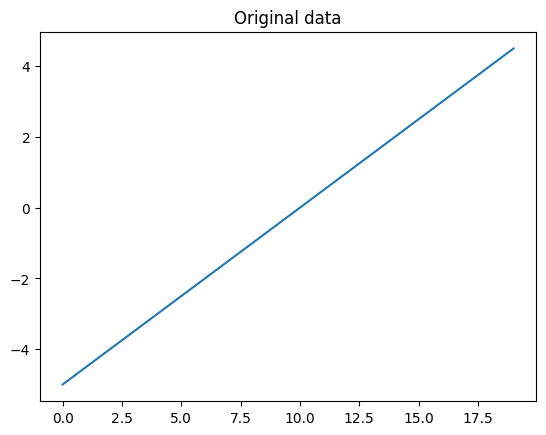

In [45]:
# Plotting the line
plt.plot(data)
plt.title("Original data")
plt.show()

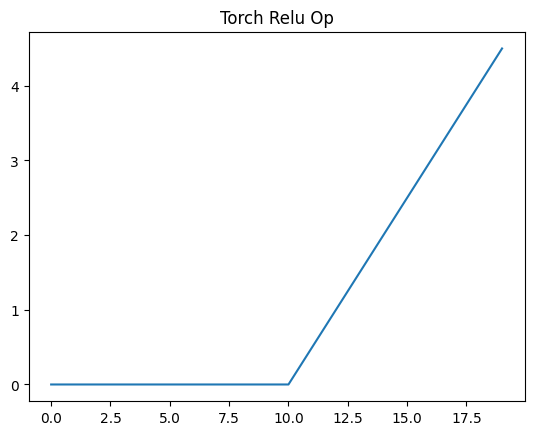

In [46]:
plt.plot(torch.relu(data))
plt.title("Torch Relu Op")
plt.show()

In [47]:
def custom_relu(x):
  return torch.max(torch.zeros_like(x), x)

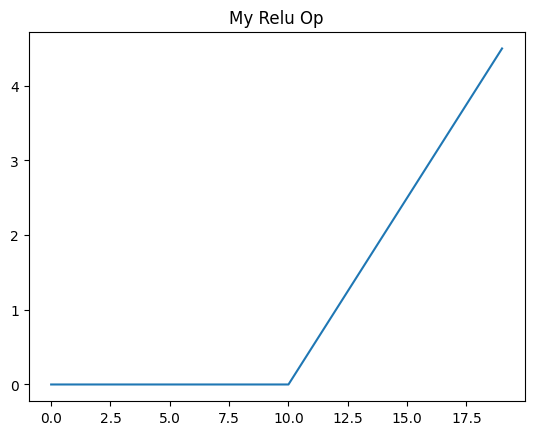

In [48]:
plt.plot(custom_relu(data))
plt.title("My Relu Op")
plt.show()


## Tryig sigmoid

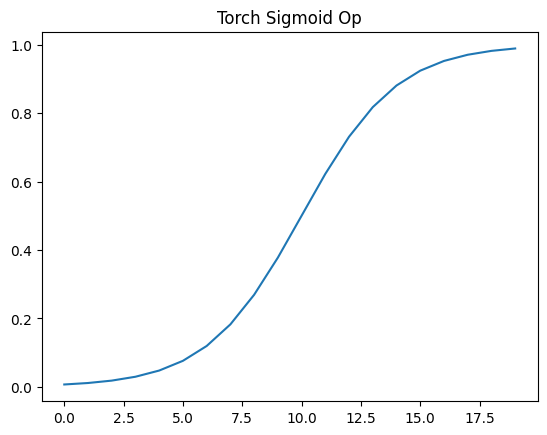

In [49]:
plt.plot(torch.sigmoid(data))
plt.title("Torch Sigmoid Op")
plt.show()

In [50]:
def custom_sigmoid(x):
  return 1/(1+torch.exp(-x))

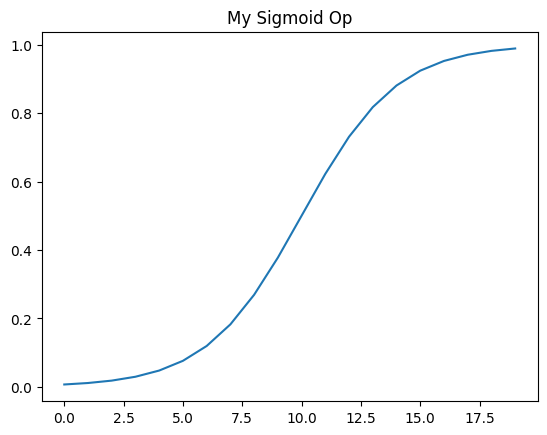

In [51]:
plt.plot(custom_sigmoid(data))
plt.title("My Sigmoid Op")
plt.show()

They match!

# 7.Putting all together with a multi class classification Model

- Class here is >2


## 7.1 Creating to dataset for multi class classification

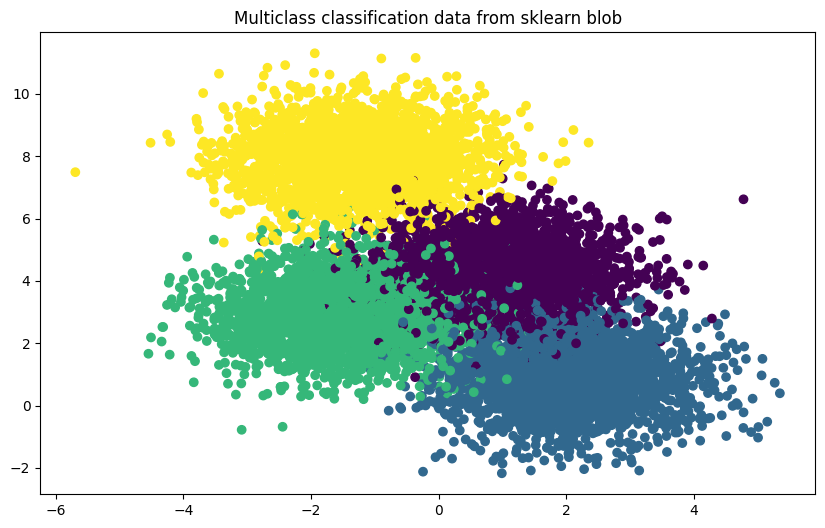

In [52]:
from sklearn.datasets import make_blobs #Generate isotropic Gaussian blobs --> multiclass
# URL for sklearn blob  -> https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.model_selection import train_test_split

# Set basic params
num_class = 4
num_feature = 2
seed_val = 0

# Create multiclass data
X_blob, y_blob = make_blobs(n_samples=10000,
                                n_features=num_feature,
                                centers=num_class,
                                cluster_std=1.0, # Shake up clusters a bit. 1.0 seems to give a good mix. CAN ALSO be altered to get a different distribution
                                random_state=seed_val)

# turn data to tensors
X_blob, y_blob = torch.from_numpy(X_blob).type(torch.float), torch.from_numpy(y_blob).type(torch.LongTensor) # Specifically made as long tensor

# Split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=seed_val)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob)
plt.title("Multiclass classification data from sklearn blob")
plt.show()

In [53]:
# Let's look at the y_blob and its shape
y_blob[:10], y_blob.shape, y_blob.ndim

(tensor([0, 3, 2, 3, 3, 0, 3, 2, 0, 3]), torch.Size([10000]), 1)

## 7.2 Building a model

In [54]:
# Let's build a model to handle multiclasses
class multiclass_classification(nn.Module): # inherits from nn.Module (base class for all NN models)
    def __init__(self):
      """ Define a model for multiclass classification .
      Args:
      Returns:
        Model op wo softmax
      """

      super().__init__()

      # Create 2 nn.Linear layers with Relu in between using nn.sequential

      self.non_lin_layer = nn.Sequential(
          nn.Linear(in_features=2, out_features=32),
          nn.ReLU(),
          nn.Linear(in_features=32, out_features=32),
          nn.ReLU(),
          nn.Linear(in_features=32, out_features=num_class),
      )

    def forward(self, x: torch.tensor) -> torch.tensor:
      return self.non_lin_layer(x)

# Instantiate a model of sub-class multiclass_classification
Model_3 = multiclass_classification()

## 7.3 Define loss function and optimizer

In [55]:
# Defining the loss function
loss_fn = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = torch.optim.SGD(params = Model_3.parameters(), lr  = 0.05) # Very high LR

## 7.4 Get predictions for multiclass model with loss and accuracy

We need to convert Logit(raw op) -> pred_prob of each class - >labels (actual target)

In [56]:
# Let's predict on test data
with torch.inference_mode():  # Context manager. It disables all grad calculation for training. Use this only when predicting on test
  y_test_logits = Model_3(X_test).squeeze() # This is to get the logits
  y_pred_prob = torch.softmax(y_test_logits, dim=1) # This is to convert to probabilities
  y_pred_test = y_pred_prob.argmax(dim=1) # this is to get arhmax and hence get the labels of the classes

# Seeing the distribution of initial prediction
pd.DataFrame({"y_pred_test":y_pred_test})["y_pred_test"].value_counts()

,count
y_pred_test,
3,857
1,625
2,517
0,1


Random predictions -- accuracy would be bad

In [57]:
## Print out the accuracy of inital prediction (randomly defined params)
acc_init = accuracy_fn(y_test, y_pred_test)
loss_init = loss_fn(y_test_logits, y_test)
print(f"Initial accuracy: {np.round(acc_init,4)}, Initial loss: {loss_init}")

Initial accuracy: 0.036, Initial loss: 1.4671034812927246


Let's see how does the boundaries look based on random predictions

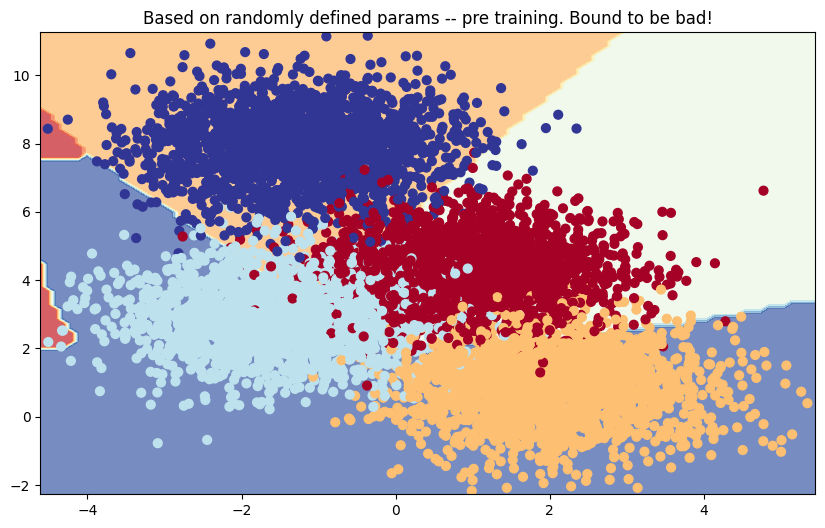

In [58]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(Model_3, X_train, y_train)
plt.title(f"Based on randomly defined params -- pre training. Bound to be bad!")
plt.show()

## 7.5 Train the model

epoch: 0: Train loss:1.4716999530792236, Train Accuracy: 0.0371, Test accuracy: 0.2545


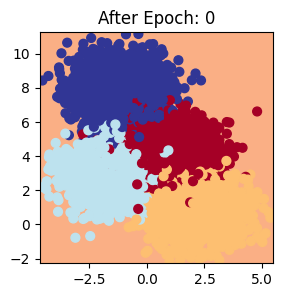

epoch: 1000: Train loss:0.19439999759197235, Train Accuracy: 0.9311, Test accuracy: 0.9415


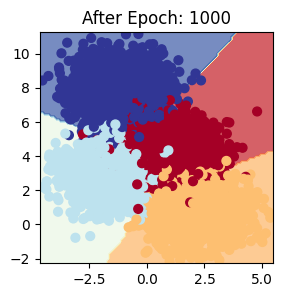

epoch: 2000: Train loss:0.18809999525547028, Train Accuracy: 0.9318, Test accuracy: 0.9425


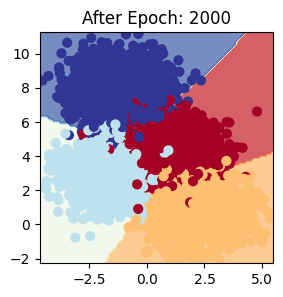

epoch: 3000: Train loss:0.1850000023841858, Train Accuracy: 0.933, Test accuracy: 0.942


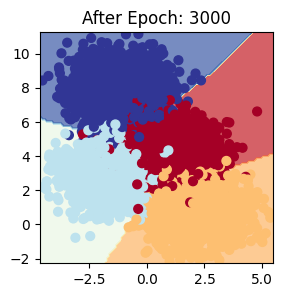

epoch: 4000: Train loss:0.18330000340938568, Train Accuracy: 0.9328, Test accuracy: 0.9415


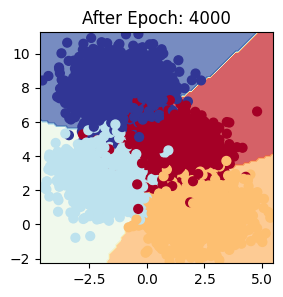

In [59]:
# set manual seed
torch.manual_seed(0)

# define epochs
epochs = 5000

# Initiate a list to keep track of losses
train_loss_capture = []
test_loss_capture = []

for epoch in range(epochs):
    # set the model to training mode
    Model_3.train() # Sets requires_grad = True

    # 1. forward pass
    y_logits = Model_3(X_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    #print(y_pred,y_train)

    #2. Calculate loss and accuracy
    loss= loss_fn(y_logits, y_train)
    train_loss_capture.append(loss.item())
    acc_train = accuracy_fn(y_train, y_pred)

    #3. Flush out the old gradients and compute gradients based on loss. Backpropagation
    optimizer.zero_grad() # to clear out the gradients of all parameters that the optimizer is tracking
    loss.backward()

    # 4. Update parameters using an Optimizer
    if epoch == 500:                          # If you really want to overfit --  in normal use case it is an overkill
      optimizer.param_groups[0]['lr'] = 0.01
    # if epoch == 700:
    #   optimizer.param_groups[0]['lr'] = 0.0005

    optimizer.step()

    Model_3.eval()

    # Testing on validation set
    with torch.inference_mode():  # Context manager. It disables all grad calculation for training. Use this only when predicting on test
      y_test_logits = Model_3(X_test).squeeze() # This is to get the logits
      y_pred_prob = torch.softmax(y_test_logits, dim=1) # This is to convert to probabilities
      y_pred_test = y_pred_prob.argmax(dim=1) # this is to get arhmax and hence get the labels of the classes
      test_loss = loss_fn(y_test_logits, y_test)
      acc_test = accuracy_fn(y_test, y_pred_test)
      test_loss_capture.append(test_loss.item())
    # print(test_loss, accuracy_fn(y_test, y_pred_test))
    if epoch % 1000 == 0:
      print(f"epoch: {epoch}: Train loss:{torch.round(loss,decimals = 4)}, Train Accuracy: {np.round(acc_train,4)}, Test accuracy: {np.round(acc_test,4)}")
      plt.figure(figsize=(3, 3))
      plot_decision_boundary(Model_3, X_train, y_train)
      plt.title(f"After Epoch: {epoch}")
      plt.show()


## 7.6 Visualize the results

[]

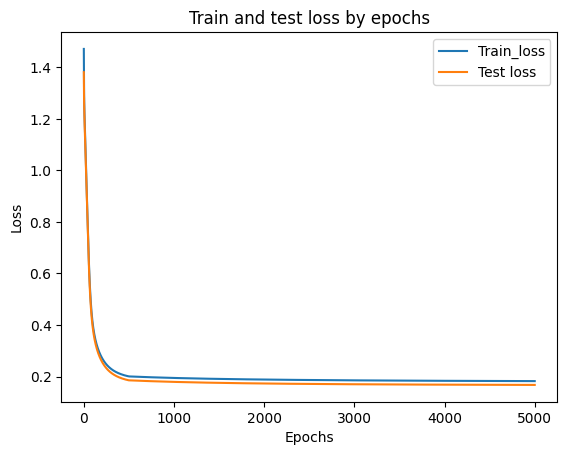

In [60]:
# Plot lose to see if it makes sense!
plt.plot(np.arange(0,epochs), train_loss_capture)
plt.plot(np.arange(0,epochs), test_loss_capture)
plt.title("Train and test loss by epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train_loss", "Test loss"])
plt.plot()

In [61]:
# Let's predict on test data
with torch.inference_mode():  # Context manager. It disables all grad calculation for training. Use this only when predicting on test
  y_test_logits = Model_3(X_test).squeeze() # This is to get the logits
  y_pred_prob = torch.softmax(y_test_logits, dim=1) # This is to convert to probabilities
  y_pred_test = y_pred_prob.argmax(dim=1) # this is to get arhmax and hence get the labels of the classes

# Seeing the distribution of initial prediction
pd.DataFrame({"y_pred_test":y_pred_test})["y_pred_test"].value_counts()

,count
y_pred_test,
1,519
3,513
2,503
0,465


In [62]:
## Print out the accuracy of inital prediction (randomly defined params)
accuracy_fn(y_test, y_pred_test)

0.9405

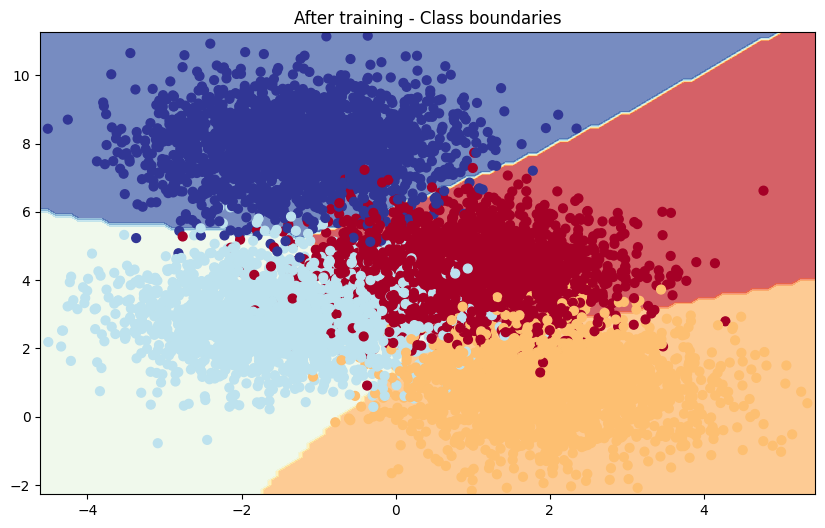

In [63]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(Model_3, X_train, y_train)
plt.title(f"After training - Class boundaries")
plt.show()

Wow!! Boundaries seem pretty accurate!

# 8.Classificaton Metrics -  model evaluation

1. Accuracy =  (TP+TN)/(TP+TN+FP+FN)
2. Precision = TP /(TP+FP)
3. Recall = TP/(TP+FN)
4. F1-score = (Precision . Recall)/(Precision + Recall)

For additional reading -
Metrics from torchmetrics -  https://lightning.ai/docs/torchmetrics/stable/

Read about metrics - https://willkoehrsen.github.io/statistics/learning/beyond-accuracy-precision-and-recall/

In [64]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 37.7 MB/s eta 0:00:00


In [65]:
from torchmetrics import Accuracy
from torchmetrics.classification import MulticlassPrecision, MulticlassRecall, MulticlassF1Score

# set up metrics
model_accuracy = Accuracy(task="multiclass", num_classes=4)
precision = MulticlassPrecision(num_classes=4, average='macro')  # Can also be 'micro' or 'weighted'
recall = MulticlassRecall(num_classes=4, average='macro')
f1 = MulticlassF1Score(num_classes=4, average='macro')

# Getting Model results
print(f"Model Accuracy: {np.round(model_accuracy(y_pred_test, y_test).numpy()*100,4)} %")
print(f"Model Precision: {np.round(precision(y_pred_test, y_test).numpy()*100,4)} %")
print(f"Model Recall: {np.round(recall(y_pred_test, y_test).numpy()*100,4)} %")
print(f"Model F-1 score: {np.round(f1(y_pred_test, y_test).numpy()*100,4)} %")

Model Accuracy: 94.05 %
Model Precision: 93.9311 %
Model Recall: 93.9321 %
Model F-1 score: 93.9308 %


Hurray!!!! done with this section :)